# Illustrations for HBOS algorithm

In [1]:
import json

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from pyod.models.hbos import HBOS

In [2]:
with open('config.json', 'r') as config_file:
    config = json.load(config_file)

In [3]:
BASE_COLOR = config['base_color']
LIGHT_COLOR = config['light_color']
DPI = config['dpi']
EDGE_COLOR = config['edge_color']

In [4]:
palette = f"blend:{BASE_COLOR},{LIGHT_COLOR}"

In [5]:
np.random.seed(42)

In [6]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

In [7]:
df_young = pd.DataFrame({'возраст': np.random.normal(24, 1, 100),
                         'оклад': np.random.normal(30000, 5000, 100),
                         'премия': np.random.normal(10000, 1000, 100),
                         'грейд': np.random.randint(1, 4, 100)})

In [8]:
df_old = pd.DataFrame({'возраст': np.random.normal(60, 4, 200),
                       'оклад': np.random.normal(60000, 10000, 200),
                       'премия': np.random.normal(15000, 1000, 200),
                       'грейд': np.random.randint(4, 8, 200)})

In [9]:
df_med = pd.DataFrame({'возраст': np.random.normal(35, 4, 5),
                       'оклад': np.random.normal(60000, 10000, 5),
                       'премия': np.random.normal(12000, 1000, 5),
                       'грейд': np.random.randint(3, 7, 5)})

In [10]:
df_comb = pd.concat([df_young, df_old, df_med])

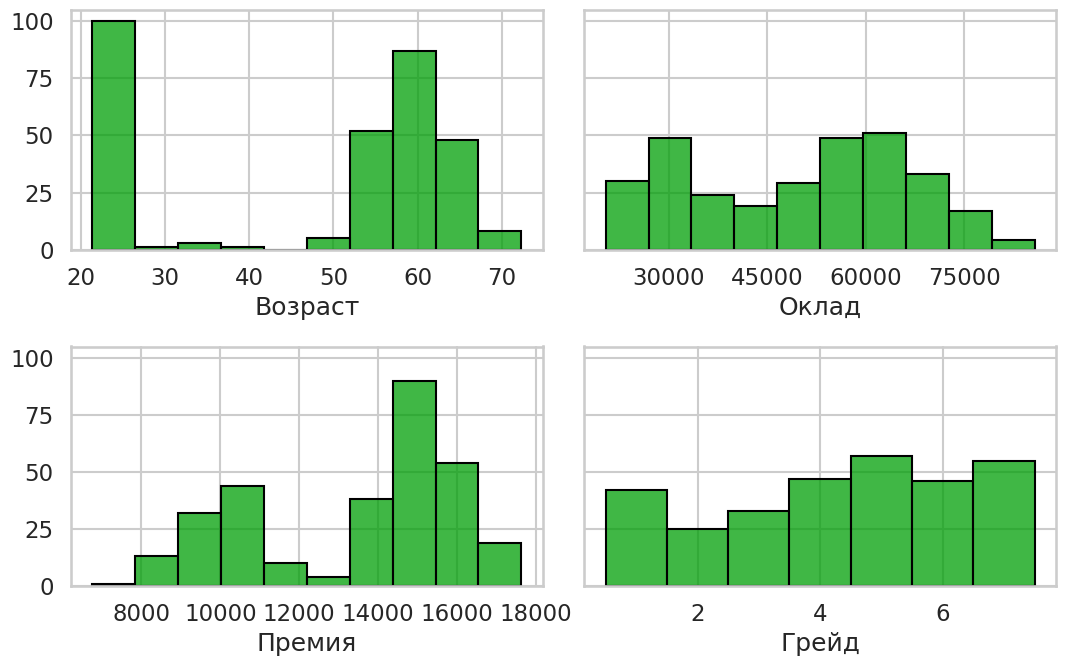

In [11]:
_, [[axs_one, axs_two], [axs_three, axs_four]] = plt.subplots(2, 2,
                                     figsize=(11, 7), 
                                     sharey=True,
                                     gridspec_kw=dict(width_ratios=[1,1], height_ratios=[1,1]))

sns.histplot(df_comb, bins=10, x='возраст', color=BASE_COLOR, edgecolor=EDGE_COLOR, ax=axs_one)
axs_one.set(ylabel='', xlabel='Возраст')
sns.histplot(df_comb, bins=10, x='оклад', color=BASE_COLOR, edgecolor=EDGE_COLOR, ax=axs_two)
axs_two.set(ylabel='', xlabel='Оклад')
axs_two.xaxis.set_major_locator(MaxNLocator(5))
sns.histplot(df_comb, bins=10, x='премия', color=BASE_COLOR, edgecolor=EDGE_COLOR, ax=axs_three)
axs_three.set(ylabel='', xlabel='Премия')
ax = sns.histplot(df_comb, bins=10, x='грейд', color=BASE_COLOR, edgecolor=EDGE_COLOR, ax=axs_four, discrete=True)
axs_four.set(ylabel='', xlabel='Грейд')
plt.tight_layout()
plt.savefig("images/hbos_hists.png", transparent=True, dpi=DPI)

In [12]:
age = 30
salary = 50000
bonus = 13000
grade = 5

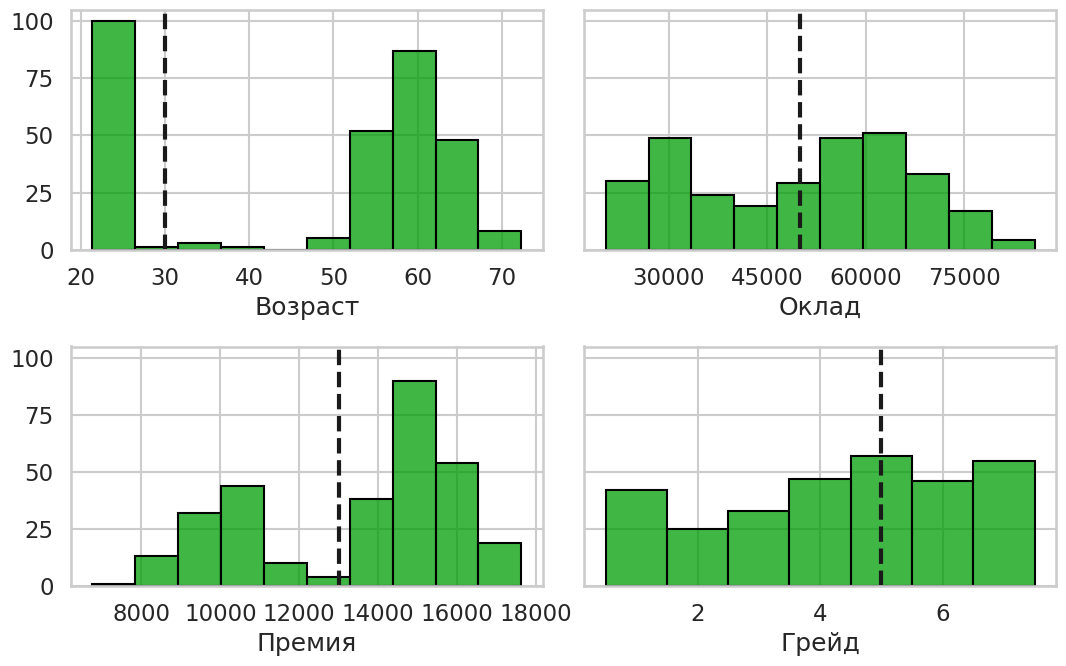

In [13]:
_, [[axs_one, axs_two], [axs_three, axs_four]] = plt.subplots(2, 2,
                                     figsize=(11, 7), 
                                     sharey=True,
                                     gridspec_kw=dict(width_ratios=[1,1], height_ratios=[1,1]))

sns.histplot(df_comb, bins=10, x='возраст', color=BASE_COLOR, edgecolor=EDGE_COLOR, ax=axs_one)
axs_one.set(ylabel='', xlabel='Возраст')
axs_one.axvline(x=age, color='k', linestyle='--', linewidth=3)
sns.histplot(df_comb, bins=10, x='оклад', color=BASE_COLOR, edgecolor=EDGE_COLOR, ax=axs_two)
axs_two.set(ylabel='', xlabel='Оклад')
axs_two.axvline(x=salary, color='k', linestyle='--', linewidth=3)
axs_two.xaxis.set_major_locator(MaxNLocator(5))
sns.histplot(df_comb, bins=10, x='премия', color=BASE_COLOR, edgecolor=EDGE_COLOR, ax=axs_three)
axs_three.set(ylabel='', xlabel='Премия')
axs_three.axvline(x=bonus, color='k', linestyle='--', linewidth=3)
sns.histplot(df_comb, bins=10, x='грейд', color=BASE_COLOR, edgecolor=EDGE_COLOR, ax=axs_four, discrete=True)
axs_four.set(ylabel='', xlabel='Грейд')
axs_four.axvline(x=grade, color='k', linestyle='--', linewidth=3)
plt.tight_layout()
plt.savefig("images/hbos_hists_lines.png", transparent=True, dpi=DPI)

In [14]:
age_counts, age_bins = np.histogram(df_comb['возраст'], bins=10)
age_bin_index = np.digitize(age, age_bins) - 1 
age_height = age_counts[age_bin_index] if age_bin_index < len(age_counts) else 0

In [15]:
age_height

np.int64(1)

In [16]:
age_counts.max()

np.int64(100)

In [17]:
salary_counts, salary_bins = np.histogram(df_comb['оклад'], bins=10)
salary_bin_index = np.digitize(salary, salary_bins) - 1
salary_height = salary_counts[salary_bin_index] if salary_bin_index < len(salary_counts) else 0

In [18]:
salary_height

np.int64(29)

In [19]:
salary_counts.max()

np.int64(51)

In [20]:
bonus_counts, bonus_bins = np.histogram(df_comb['премия'], bins=10)
bonus_bin_index = np.digitize(bonus, bonus_bins) - 1
bonus_height = bonus_counts[bonus_bin_index] if bonus_bin_index < len(bonus_counts) else 0

In [21]:
bonus_height

np.int64(4)

In [22]:
bonus_counts.max()

np.int64(90)

In [23]:
grade_height = (df_comb['грейд'] == grade).sum()

In [24]:
grade_height

np.int64(57)

In [25]:
df_comb['грейд'].value_counts().sort_index().max()

np.int64(57)

In [26]:
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

In [27]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [28]:
offset = 3

In [29]:
X1 = 0.5 * np.random.randn(n_inliers) + offset
X2 = 0.5 * np.random.randn(n_inliers) - offset

In [30]:
outliers_1 = np.random.uniform(low=-6, high=6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-6, high=6, size=(n_outliers))

In [31]:
data = pd.concat([pd.DataFrame({'попугаи': X1, 'удавы': X2}), 
                  pd.DataFrame({'попугаи': outliers_1, 'удавы': outliers_2})]).reset_index(drop=True)

In [32]:
clf = HBOS()

In [33]:
clf.fit(data)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [34]:
y_train_scores = clf.decision_scores_

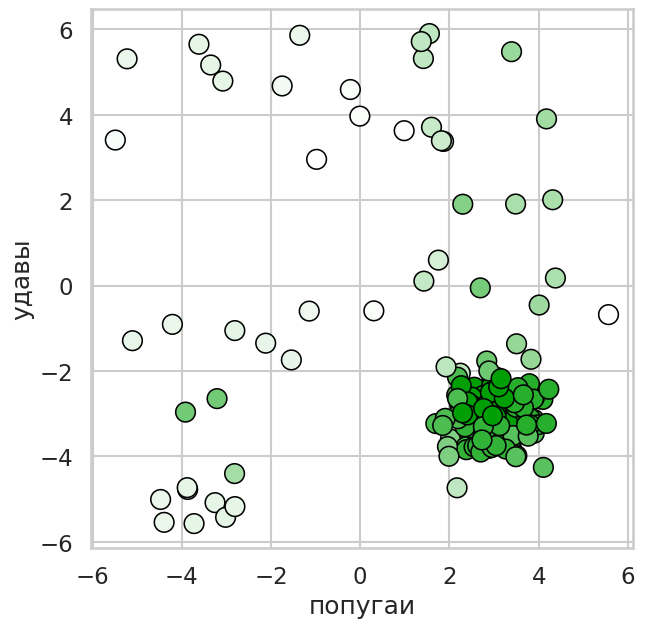

In [35]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data, x='попугаи', y='удавы', s=200, edgecolor=EDGE_COLOR, 
                hue=y_train_scores, palette=sns.color_palette(palette, as_cmap=True), legend=False)
plt.savefig("images/hbos_anomalies.png", transparent=True, dpi=DPI)

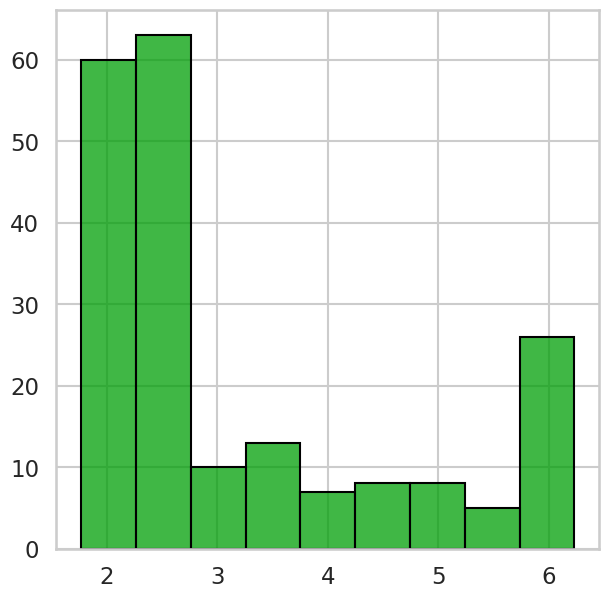

In [36]:
plt.figure(figsize=(7, 7))
ax = sns.histplot(y_train_scores, color=BASE_COLOR, edgecolor=EDGE_COLOR)
ax.set(ylabel='')
plt.savefig("images/hbos_score_histogram.png", transparent=True, dpi=DPI)